# K Nearest Neighbors Classifier 

The K Nearest Neighbors (KNN) algorithm is a type of supervised machine learning algorithm used for classification and regression tasks. In classification tasks, KNN predicts the class label of a new data point based on the class labels of the K nearest training data points.

The KNN algorithm is simple to understand and implement, making it a popular choice for classification tasks. To classify a new data point, KNN first calculates the distance between the new data point and all the training data points. It then selects the K training data points that are closest to the new data point based on the distance metric.

Once the K nearest neighbors have been identified, KNN assigns the new data point to the class that is most common among its K nearest neighbors. For example, if the K nearest neighbors are three red points and two blue points, KNN will classify the new data point as red.

The choice of K is a crucial hyperparameter in KNN, as it determines the number of neighbors that will be considered when making predictions. A small value of K may result in overfitting, while a large value of K may result in underfitting. Therefore, it is essential to choose an appropriate value of K for the given problem.

Overall, KNN is a versatile algorithm that can be used for both classification and regression tasks, and it is a good choice when the dataset is small and the number of features is low. However, it can become computationally expensive when dealing with large datasets.

**Modules Used**
* Numpy 
* Pandas 
* Counter
* Matplotlib

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

Lets assume we have this dataset 

In [45]:
sample_data = pd.read_csv("/content/data.csv")

In [46]:
sample_data

,x,y,z
0,45.421668,78.718579,a
1,-16.600399,107.412107,a
2,5.468566,103.051290,a
3,29.698926,79.087038,a
4,-11.641939,120.587423,a
...,...,...,...
892,682.001039,408.092381,b
893,635.329223,373.553558,b
894,682.889704,371.126353,b
895,636.080188,324.660341,b


Lets try to plot this on a scatter plot 

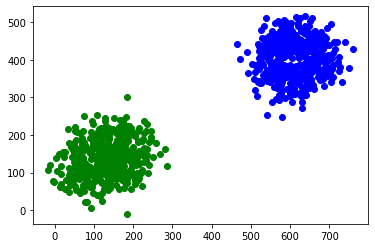

In [47]:
x_a = sample_data[sample_data["z"] == "a"]["x"]
y_a = sample_data[sample_data["z"] == "a"]["y"]
x_b = sample_data[sample_data["z"] == "b"]["x"]
y_b = sample_data[sample_data["z"] == "b"]["y"]
plt.scatter(x_a , y_a , c = "green")
plt.scatter(x_b , y_b , c = "blue")

Lets assume we have a point with these coordinated , $(400 , 300)$ and try to find wether it will be a green point or a blue point 

The logic behind `K nearest Neighbors` is to find the `euclidian distance` between `k` nearest points of the point we need to dinf and the point we need to find. As we are dealing with $2$ point coordinate system only(as of now), we will be using the formula $$euclidian_-distance = \sqrt {(x_1 - x_2) ^ 2 + (y_1 - y_2) ^ 2}$$

In [48]:
x1 = 400
y1 = 300
distance = [np.sqrt(np.square(x1 - x2) + np.square(y1 - y2)) for x2 , y2 in zip(sample_data["x"] , sample_data["y"])]

In [49]:
#distance # I have commented this line as it will just increase useless space in the notebook, Uncomment it to test it 

Now we just need to sort this list in descending order to find the point with the least distance. When we have the index of the lowest distance, we can just put that index into the labels column, and find the label to the predicted value 

In [50]:
np.argmin(distance)

560

In [51]:
sample_data["z"][np.argmin(distance)]

'b'

So our model says that this point should be blue

Now lets first all of this into a function, and add some functionality to it 

In [52]:
def KNNC(X_train , Y_train , x1 , y1):
    
    distance = [np.sqrt(np.square(x1 - x2) + np.square(y1 - y2)) for x2 , y2 in zip(X_train["x"] , X_train["y"])]
    
    return sample_data["z"][np.argmin(distance)]

Let assume we are finding the distance with more than $k = 1$ points. For this we will be using the `most_common` function form collections 

In [53]:
from collections import Counter

def KNNC(X_train , Y_train , x1 , y1 , k = 5):
    
    distance = [np.sqrt(np.square(x1 - x2) + np.square(y1 - y2)) for x2 , y2 in zip(X_train["x"] , X_train["y"])]
    
    k_indices = np.argsort(distance)[:k]
    k_nearest_labels = [Y_train[i] for i in k_indices]
    
    most_commons = Counter(k_nearest_labels).most_common()
    
    return most_commons[0][0]

Now lets assume we have a list of predicting columns instead of just $1$

In [54]:
class KNearestNeighborsClassifier():
  
    def __init__(self , k = 3):
  
        self.k = k

    def fit(self , X_train , Y_train):
  
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self , X_test):
  
        self.X_test = X_test
  
        predictions = [self.predict_proba(i) for i in X_test]
  
        return predictions

    def predict_proba(self , i):
  
        distances = [self.euc_dis(x , X_train) for X_train in self.X_train]
  
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]
  
        most_commons = Counter(k_nearest_labels).most_common()
  
        return most_commons[0][0]

    euc_dis = lambda x1 , x2 : np.sqrt(np.sum(np.square(x1 - x2)))